In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


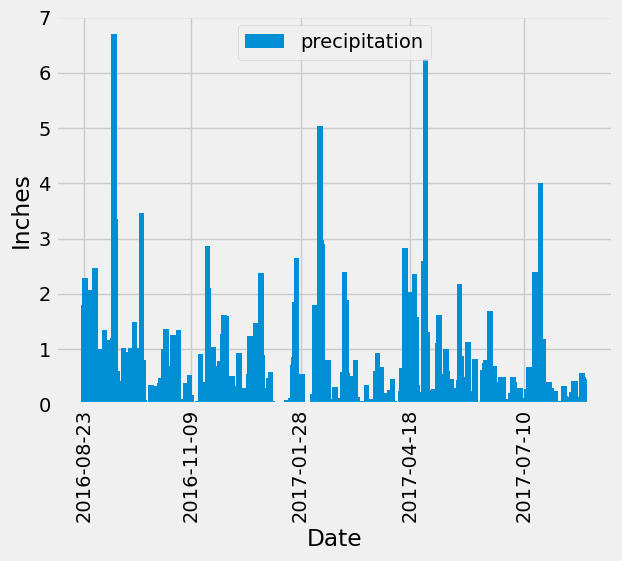

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 , 23) - dt.timedelta(days=365)
# print(year_ago)

# Perform a query to retrieve the data and precipitation scores
filtered = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
# print(filtered)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(filtered, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(prcp_df["Date"], prcp_df["Precipitation"], width=4, label="precipitation")
plt.legend(loc='upper center')
plt.xticks(["2016-08-23", "2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"], rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
num_stations = session.query(func.count(Station.station)).all()
num_stations

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
active_station_temps

[(54.0, 85.0, 71.66378066378067)]

In [60]:
# Using the most active station id, query the last 12 months of temperature observation data for this station
# Find the most recent date for the most active station id
recent_station_date = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
print(recent_station_date)

('2017-08-18',)


In [61]:
# Calculate the date one year from the most recent date for the most active station id
station_year_ago = dt.date(2017, 8 , 18) - dt.timedelta(days=365)
print(station_year_ago)

2016-08-18


In [62]:
# Filter for the last 12 months of temperature observation data for the most active station id
station_temps = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= '2016-08-18').all() 

In [ ]:
# Loop through temperature data and store as a list
temp_list =[]

for temp in station_temps:
    temp_list.append(temp[0])

Text(0, 0.5, 'Frequency')

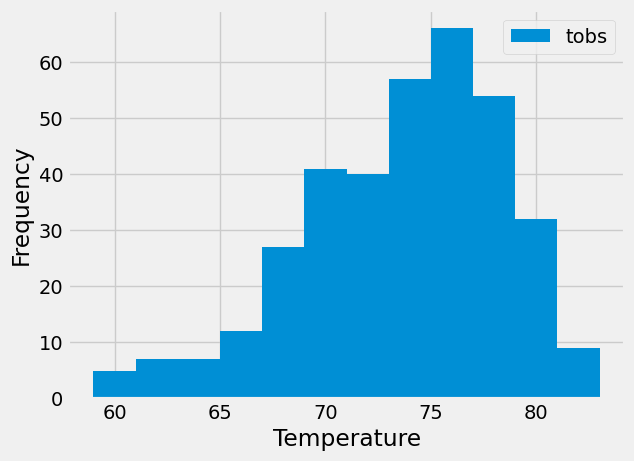

In [80]:
# Plot the results as a histogram
plt.hist(temp_list, bins=12, label="tobs")

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [108]:
# Close Session
session.close()